# Kaggle: IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.

In [81]:
#1. Show a breakdown of distance from home by job role and attrition.

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

IBMattrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

IBMattrition.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [82]:
IBMattrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
IBMattrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
IBMattrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [85]:
#Number of attritions 
IBMattrition.Attrition.value_counts()['Yes']


237

In [83]:
IBMattrition.groupby('EducationField').Attrition.value_counts()

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64

In [84]:
IBMattrition.groupby('Education').Attrition.value_counts()

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64

In [58]:
IBMattrition.groupby('StockOptionLevel').Attrition.value_counts()

StockOptionLevel  Attrition
0                 No           477
                  Yes          154
1                 No           540
                  Yes           56
2                 No           146
                  Yes           12
3                 No            70
                  Yes           15
Name: Attrition, dtype: int64

In [59]:
IBMattrition.groupby('JobInvolvement').Attrition.value_counts()

JobInvolvement  Attrition
1               No            55
                Yes           28
2               No           304
                Yes           71
3               No           743
                Yes          125
4               No           131
                Yes           13
Name: Attrition, dtype: int64

In [60]:
IBMattrition.groupby('JobSatisfaction').Attrition.value_counts()

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
Name: Attrition, dtype: int64

In [62]:
IBMattrition.groupby(['DistanceFromHome','JobRole']).Attrition.count()

DistanceFromHome  JobRole                  
1                 Healthcare Representative    23
                  Human Resources               9
                  Laboratory Technician        31
                  Manager                      13
                  Manufacturing Director       24
                                               ..
29                Manager                       4
                  Manufacturing Director        4
                  Research Scientist            4
                  Sales Executive               5
                  Sales Representative          1
Name: Attrition, Length: 224, dtype: int64

237

In [32]:
#2.Compare average monthly income by education and attrition.
IBMattrition.groupby(['Education','Attrition']).MonthlyIncome.mean()

Education  Attrition
1          No           5926.129496
           Yes          4360.161290
2          No           6586.058824
           Yes          4282.545455
3          No           6882.919662
           Yes          4770.242424
4          No           7087.814706
           Yes          5335.155172
5          No           8559.906977
           Yes          5850.200000
Name: MonthlyIncome, dtype: float64

In [44]:
IBMattrition.groupby(['YearsAtCompany','Attrition']).Age.count()


YearsAtCompany  Attrition
0               No            28
                Yes           16
1               No           112
                Yes           59
2               No           100
                            ... 
33              Yes            1
34              No             1
36              No             2
37              No             1
40              Yes            1
Name: Gender, Length: 64, dtype: int64

In [47]:
IBMattrition.groupby(['Department','Attrition']).YearsAtCompany.mean()

Department              Attrition
Human Resources         No           7.960784
                        Yes          4.166667
Research & Development  No           7.171498
                        Yes          4.954887
Sales                   No           7.745763
                        Yes          5.510870
Name: YearsAtCompany, dtype: float64

In [90]:
IBMattrition.groupby(['Department','Attrition']).Age.mean()

Department              Attrition
Human Resources         No           39.627451
                        Yes          30.083333
Research & Development  No           37.615942
                        Yes          33.473684
Sales                   No           37.135593
                        Yes          34.260870
Name: Age, dtype: float64


# Assignment3_Visualization

#Based on your analysis in Assignment 2, express your results in the form of the most appropriate visualization using any #visualization library of your choice

In [52]:
IBMattrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'Attrition by Jobrole')

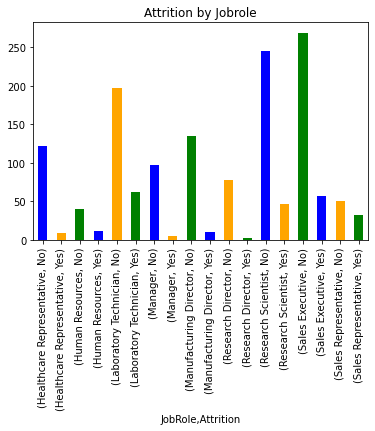

In [104]:
IBMattrition.groupby('JobRole').Attrition.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Attrition by Jobrole")

Text(0.5, 1.0, 'Education by MonthlyIncome')

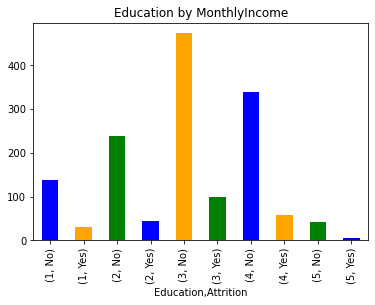

In [91]:
IBMattrition.groupby('Education').Attrition.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Attrition by Education")

Text(0.5, 1.0, 'Attrition by EducationField')

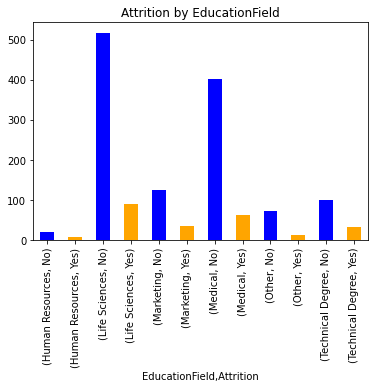

In [95]:
IBMattrition.groupby('EducationField').Attrition.value_counts().plot(kind='bar',color=['Blue','Orange'])
plt.title("Attrition by EducationField")

Text(0.5, 1.0, 'Attrition by StockOptionLevel')

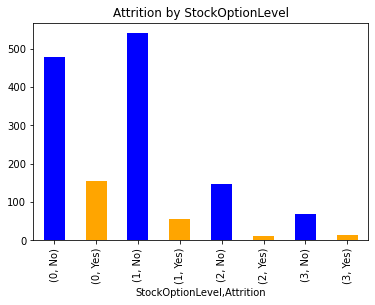

In [97]:
IBMattrition.groupby('StockOptionLevel').Attrition.value_counts().plot(kind='bar',color=['Blue','Orange'])
plt.title("Attrition by StockOptionLevel")

Text(0.5, 1.0, 'Attrition by JobSatisfaction')

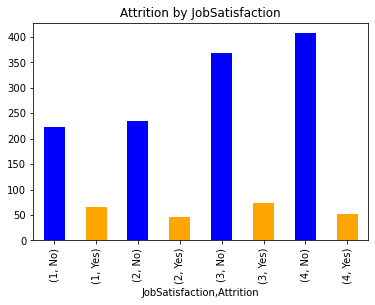

In [98]:
IBMattrition.groupby('JobSatisfaction').Attrition.value_counts().plot(kind='bar',color=['Blue','Orange'])
plt.title("Attrition by JobSatisfaction")

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


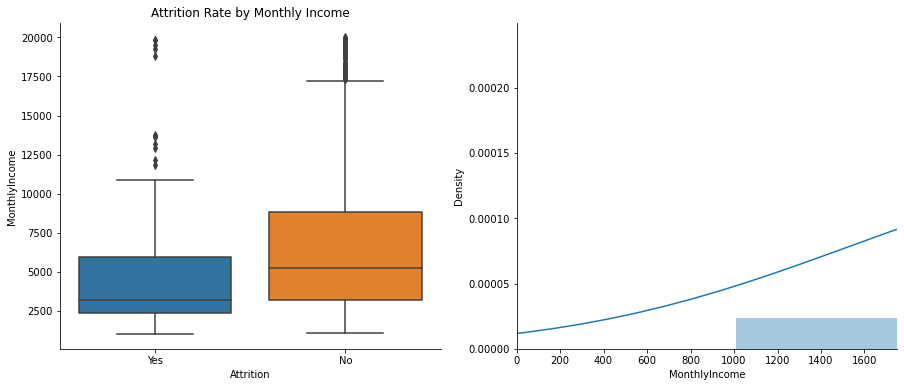

<Figure size 1080x1800 with 0 Axes>

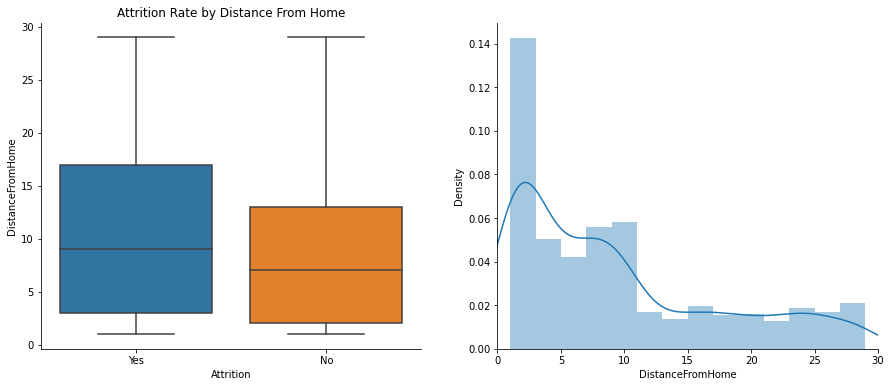

In [103]:
plt.subplots(12,figsize=[15,6])
plt.subplot(121)
sns.boxplot(x='Attrition',y='MonthlyIncome',data=IBMattrition)
plt.title("Attrition Rate by Monthly Income")
plt.subplot(122)
sns.distplot(IBMattrition['MonthlyIncome'])
plt.xlim(0,1750)
sns.despine()

plt.figure(figsize=([15,25]))
plt.subplots(15,figsize=[15,6])
plt.subplot(121)
sns.boxplot(x='Attrition',y='DistanceFromHome',data=IBMattrition)
plt.title("Attrition Rate by Distance From Home")
plt.subplot(122)
sns.distplot(IBMattrition['DistanceFromHome'])
plt.xlim(0,30)
sns.despine()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x576 with 0 Axes>

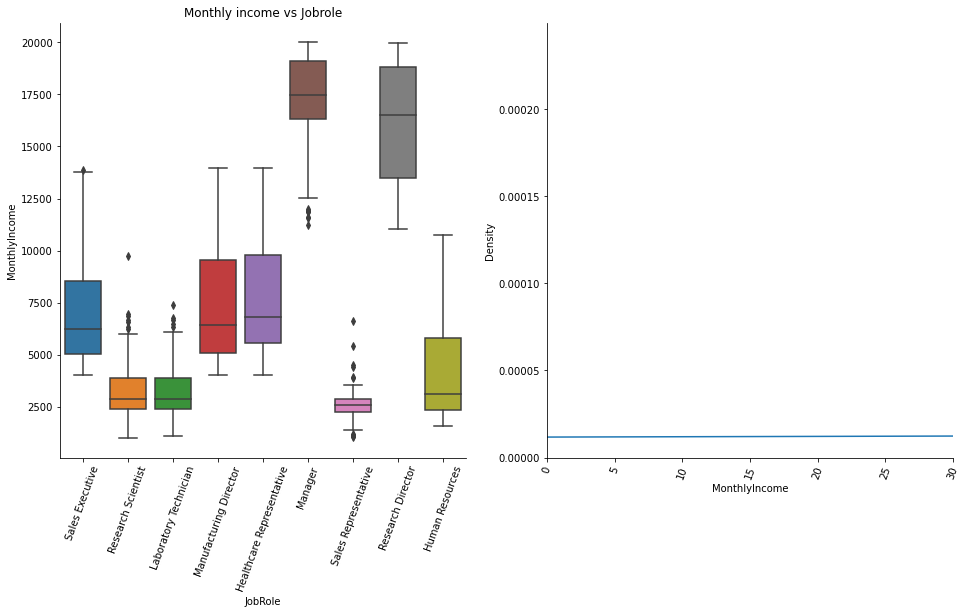

In [115]:
plt.figure(figsize=([16,8]))
plt.subplots(15,figsize=[16,8])
plt.subplot(121)
plt.xticks(rotation = 70)
sns.boxplot(x='JobRole',y='MonthlyIncome',data=IBMattrition)
plt.title("Monthly income vs Jobrole")
plt.subplot(122)
plt.xticks(rotation = 70)
sns.distplot(IBMattrition['MonthlyIncome'])
plt.xlim(0,30)
sns.despine()

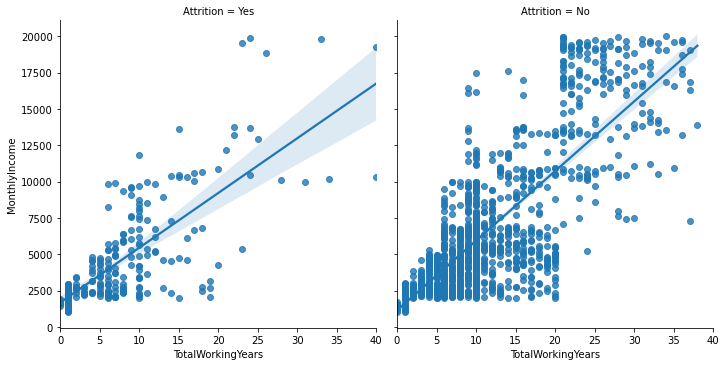

In [112]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = IBMattrition, col = 'Attrition')
plt.show()